In [42]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [43]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [4]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     Sánchez desconcierta al PSOE con su «mano tend...   real
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [5]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=70)

In [7]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3525
Fakes entrenamiento: 3475
Reales pruebas: 1475
Fakes pruebas: 1525


# Experimentos con el clasificador SVM radial y el metodo de ponderacion binario
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial binario

# Linea base

In [8]:
binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [9]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 74.548s
random state:  20
train time: 75.558s
random state:  30
train time: 75.581s
random state:  40
train time: 70.659s
random state:  50
train time: 57.102s
random state:  60
train time: 59.063s
random state:  70
train time: 55.011s
random state:  80
train time: 57.801s
random state:  90
train time: 51.137s
random state:  100
train time: 40.140s
CPU times: user 1min 43s, sys: 11.9 s, total: 1min 55s
Wall time: 10min 41s


In [12]:
binary_baseline_results = tf_baseline_results

Numero de caracteristicas:  (7000, 23367)

Best score selected:  0.8857142857142857
Best Accuracy:  0.88
Best Best F1-score:  0.8799999466666429
Best random state:  90
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8857142857142857
C: 100
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.88
F1_score: 0.8799999466666429
Precision: 0.8807046323845684
Recall: 0.8806761851854652

             precision    recall  f1-score   support

       fake     0.8561    0.9054    0.8801      1459
       real     0.9053    0.8559    0.8799      1541

avg / total     0.8814    0.8800    0.8800      3000

[[1321  138]
 [ 222 1319]]

Confusion matrix, without normalization
[[1321  138]
 [ 222 1319]]


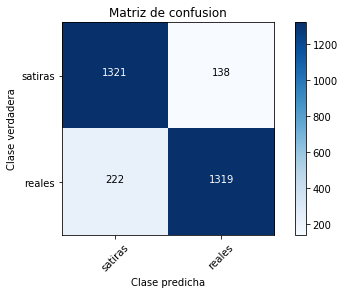

In [13]:
print_baseline_results(binary_baseline_results, parameters_svm_rbf)

In [46]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (7000, 23367)

train time: 18.575s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8857142857142857
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.88
F1_score: 0.8799999466666429
Precision: 0.8807046323845684
Recall: 0.8806761851854652

             precision    recall  f1-score   support

       fake     0.8561    0.9054    0.8801      1459
       real     0.9053    0.8559    0.8799      1541

avg / total     0.8814    0.8800    0.8800      3000

[[1321  138]
 [ 222 1319]]

Confusion matrix, without normalization
[[1321  138]
 [ 222 1319]]
CPU times: user 10.8 s, sys: 1.82 s, total: 12.6 s
Wall time: 23 s


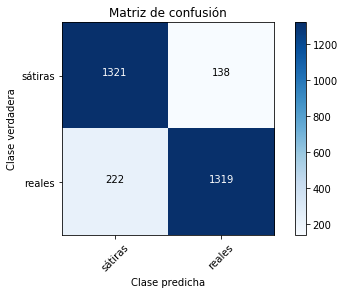

In [47]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [48]:
spanish_stopwords = stopwords.words('spanish')

In [49]:
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

Numero de caracteristicas:  (7000, 23179)

train time: 15.749s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.884
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8766666666666667
F1_score: 0.8766468753431107
Precision: 0.8784361422060034
Recall: 0.8776686048554498

             precision    recall  f1-score   support

       fake     0.8448    0.9143    0.8782      1459
       real     0.9120    0.8410    0.8751      1541

avg / total     0.8794    0.8767    0.8766      3000

[[1334  125]
 [ 245 1296]]

Confusion matrix, without normalization
[[1334  125]
 [ 245 1296]]
CPU times: user 8.34 s, sys: 1.71 s, total: 10 s
Wall time: 18.9 s


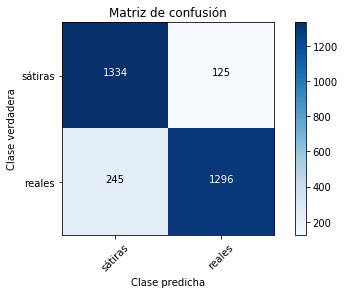

In [50]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [51]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [52]:
binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (7000, 17699)

train time: 17.081s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.872
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8766666666666667
F1_score: 0.8766611849415531
Precision: 0.8769318786482151
Recall: 0.8771397653091042

             precision    recall  f1-score   support

       fake     0.8580    0.8944    0.8758      1459
       real     0.8959    0.8598    0.8775      1541

avg / total     0.8774    0.8767    0.8767      3000

[[1305  154]
 [ 216 1325]]

Confusion matrix, without normalization
[[1305  154]
 [ 216 1325]]
CPU times: user 14.8 s, sys: 1.96 s, total: 16.8 s
Wall time: 25.4 s


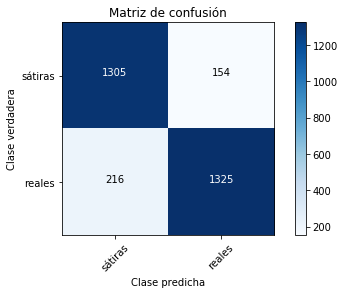

In [53]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [54]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [55]:
binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (7000, 18693)

train time: 17.411s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8764285714285714
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8683333333333333
F1_score: 0.8683315631243487
Precision: 0.8687541683340003
Recall: 0.8688822627038245

             precision    recall  f1-score   support

       fake     0.8477    0.8890    0.8678      1459
       real     0.8898    0.8488    0.8688      1541

avg / total     0.8693    0.8683    0.8683      3000

[[1297  162]
 [ 233 1308]]

Confusion matrix, without normalization
[[1297  162]
 [ 233 1308]]
CPU times: user 10.3 s, sys: 2.08 s, total: 12.3 s
Wall time: 21.3 s


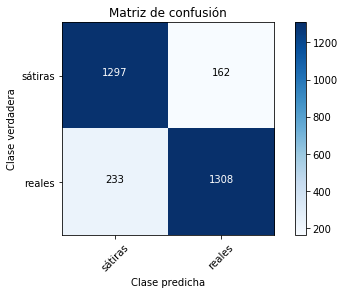

In [56]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [57]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [58]:
binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (7000, 15609)

train time: 17.927s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8502857142857143
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.847
F1_score: 0.8469190201616654
Precision: 0.8498838196523526
Recall: 0.8482624129405124

             precision    recall  f1-score   support

       fake     0.8106    0.8944    0.8504      1459
       real     0.8892    0.8021    0.8434      1541

avg / total     0.8510    0.8470    0.8468      3000

[[1305  154]
 [ 305 1236]]

Confusion matrix, without normalization
[[1305  154]
 [ 305 1236]]
CPU times: user 10.5 s, sys: 1.84 s, total: 12.4 s
Wall time: 22 s


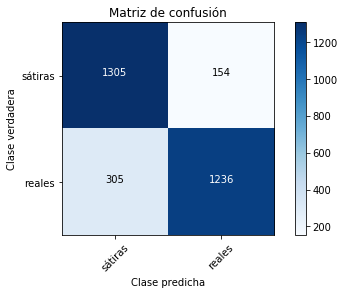

In [59]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [60]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [61]:
binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

Numero de caracteristicas:  (7000, 23288)

train time: 17.096s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8848571428571429
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8806666666666667
F1_score: 0.8806664545181413
Precision: 0.8814199446168218
Recall: 0.8813615861450266

             precision    recall  f1-score   support

       fake     0.8563    0.9068    0.8808      1459
       real     0.9065    0.8559    0.8805      1541

avg / total     0.8821    0.8807    0.8807      3000

[[1323  136]
 [ 222 1319]]

Confusion matrix, without normalization
[[1323  136]
 [ 222 1319]]
CPU times: user 12.1 s, sys: 1.39 s, total: 13.5 s
Wall time: 22.9 s


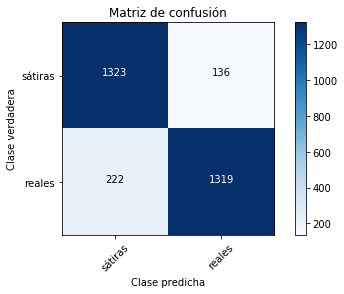

In [62]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [63]:
binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

Numero de caracteristicas:  (7000, 1218)

train time: 10.649s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8394285714285714
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8453333333333334
F1_score: 0.8441988237906605
Precision: 0.85057685108507
Recall: 0.843631175113496

             precision    recall  f1-score   support

       fake     0.8872    0.7814    0.8309      1459
       real     0.8140    0.9059    0.8575      1541

avg / total     0.8496    0.8453    0.8446      3000

[[1140  319]
 [ 145 1396]]

Confusion matrix, without normalization
[[1140  319]
 [ 145 1396]]
CPU times: user 6.62 s, sys: 1.35 s, total: 7.97 s
Wall time: 13.4 s


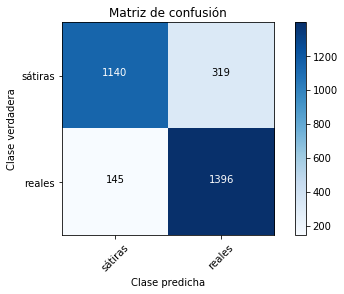

In [64]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [65]:
binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

Numero de caracteristicas:  (7000, 2643)

train time: 11.035s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8614285714285714
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8576666666666667
F1_score: 0.8570994945605777
Precision: 0.8598211208134658
Recall: 0.8565846305617664

             precision    recall  f1-score   support

       fake     0.8817    0.8170    0.8481      1459
       real     0.8380    0.8962    0.8661      1541

avg / total     0.8592    0.8577    0.8573      3000

[[1192  267]
 [ 160 1381]]

Confusion matrix, without normalization
[[1192  267]
 [ 160 1381]]
CPU times: user 6.37 s, sys: 1.45 s, total: 7.82 s
Wall time: 13.5 s


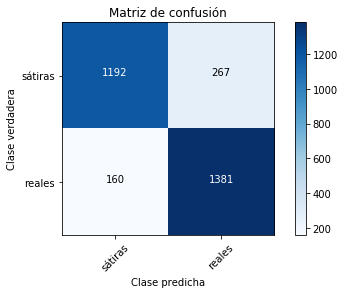

In [66]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_binary_vect_pruning5)

In [67]:
len(all_experiments_results)

8

In [68]:
import xlsxwriter

In [69]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_news_fakes_svm_rbf_binary.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()